### Importing the basic libraries that are used to perform analysis on python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from google.colab import files
uploaded = files.upload()

Saving gold_price_data.csv to gold_price_data.csv


### Reading the data

In [ ]:
gold_price_full = pd.read_csv('gold_price_data.csv')
gold_price_full['Date'] = pd.to_datetime(gold_price_full['Date'])

### Lets look at the first few rows of the data

In [ ]:
gold_price_full.head()

,Date,Value
0,1992-01-01,353.15
1,1992-02-01,356.40
2,1992-03-01,350.45
3,1992-04-01,344.00
4,1992-05-01,337.50


## `Set the DATE column as the index.`


In [ ]:
gold_price_full= gold_price_full.set_index('Date')

In [ ]:
gold_price_full.head()

,Value
Date,
1992-01-01,353.15
1992-02-01,356.40
1992-03-01,350.45
1992-04-01,344.00
1992-05-01,337.50


### We will be using data till 2017 to train and forecasting model and will be using the model to forecast the sales for 2018 onwards.

In [ ]:
train = gold_price_full.loc[:'2018-01-01',:]
test = gold_price_full.loc['2017-12-01':,:]


In [ ]:
train.head()

,Value
Date,
1992-01-01,353.15
1992-02-01,356.40
1992-03-01,350.45
1992-04-01,344.00
1992-05-01,337.50


## Making the time plot of the train dataset to visualise it


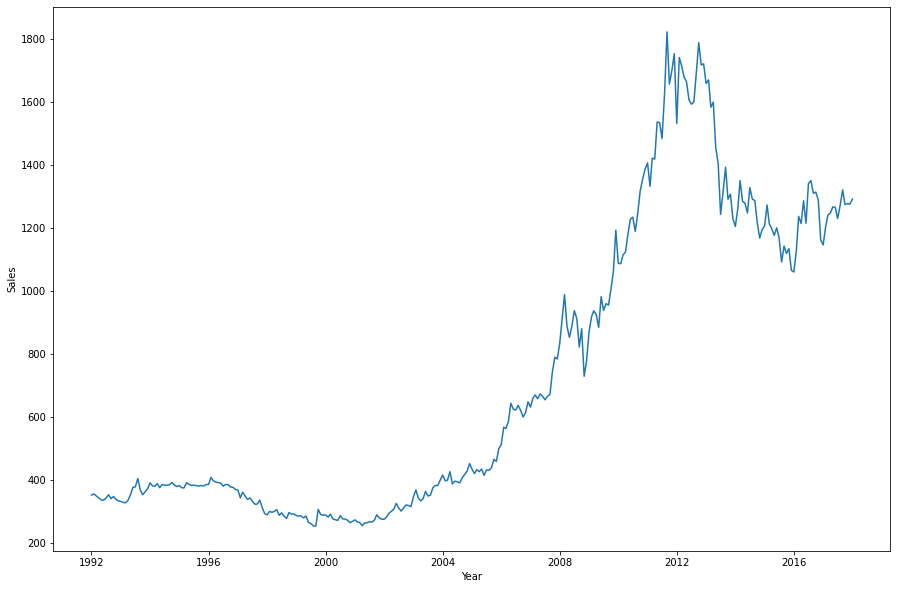

In [ ]:
plt.figure(figsize=[15,10])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.plot(train)

## Question - 1: Write your observations about value of gold in detail.

### From the above graph, it can be seen that the value of gold is showing somewhat stable trend from the year 1992 to 2004 and an increasing trend from the year 2004 to 2012 followed by a downward trend from the year 2012 to 2016 and again moving to the increasing trend from 2016 onwards. It can also be seen from the above graph that in each trend whether increasing or decreasing, the value of gold is getting corrected to its mean value or mean price at that point in time. The starting sales value was 400, followed by maximum value of 1800 and then decrease in value to around 1100 and then again an increase to value of 1300 from thereafter post year 2016. The above graph is capturing the trend of the gold prices but not its seasonality.

In [ ]:
# Run this cell and don't make any changes
for_sma = train.copy()

First, Let's use a simple forecasting technique. Implementing the simple moving average forecasting model with a rolling window of 12 months

In [ ]:
for_sma['SMA_12'] = for_sma['Value'].rolling(window = 12).mean()
for_sma.tail()

,Value,SMA_12
Date,,
2017-09-01,1320.40,1246.058333
2017-10-01,1273.70,1242.758333
2017-11-01,1277.05,1241.808333
2017-12-01,1275.50,1251.279167
2018-01-01,1291.00,1263.370833


In [ ]:
import math
#for_sma = for_sma.drop(['sq_error'],axis=1)

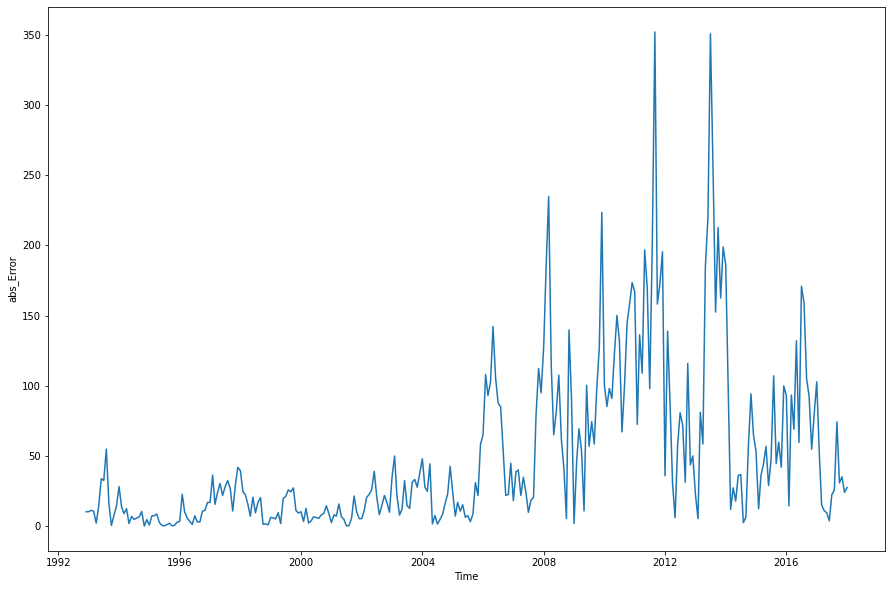

In [ ]:
for_sma["abs_error"] = 0
for_sma["abs_error"] = abs(for_sma['SMA_12']-for_sma['Value'])
plt.figure(figsize=[15,10])
plt.xlabel('Time')
plt.ylabel('abs_Error')
plt.plot(for_sma["abs_error"])

In [ ]:
error_analysis = for_sma.copy()
error_analysis = error_analysis.sort_values(by=['abs_error'],ascending=False)
error_analysis.head(24)

,Value,SMA_12,abs_error
Date,,,
2011-09-01,1821.00,1469.020833,351.979167
2013-07-01,1242.75,1593.395833,350.645833
2013-08-01,1315.00,1569.729167,254.729167
2008-03-01,988.50,753.737500,234.762500
2009-12-01,1192.50,969.020833,223.479167
2013-06-01,1402.50,1622.500000,220.000000
2013-10-01,1290.75,1503.437500,212.687500
2011-08-01,1623.00,1421.145833,201.854167
2013-12-01,1229.50,1428.437500,198.937500


## Question - 2: According to the results obtained in the previous question, what can you infer about the results obtained? Is the moving average model working fine?

### As per the codes above, we have calculated the absolute error and noted that in some months the absolute error is high, that means there is a huge difference between actual value and predicted value. Hence it can be noted that the moving average model is not working fine since it is counting the irregularities in data as can be seen from the error analysis done above.Overall, the irregularities would in the data needs to be removed from the time series before using the moving average model.

Now lets build an Auto-Regressive models

## Question-3: Before we moving ahead building an Auto Regressive model, we would be required to remove trend and seasonality from the give time series. Answer, why does Trend and seasonality affect Auto regressive models adversely and why is it required to be removed before building a ARIMA model?

### One of the assumptions of ARIMA model is that it works on the assumptions of stationarity of data (i.e having a constant variance and mean), hence that means that in case of data having time trends or seasonal variations, ARIMA model will not work as trend can result in varying mean over time, while seasonality can result in changing variance overtime. For the data with trends generally ARIMAX model is used and for data with seasonality, SARIMA model is used.

## Lets check the rolling statistics

In [ ]:
train = train.iloc[:-1,:]
from matplotlib.pylab import rcParams
def rolling_means(time_series):
    rolmean  =  time_series.rolling(window = 12).mean()
    rolstd  =  time_series.rolling(window = 12).std()

    #Plot rolling statistics

    rcParams['figure.figsize']  =  10, 5

    orig  =  plt.plot(time_series, color = 'blue', label = 'Original')
    mean  =  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std  =  plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

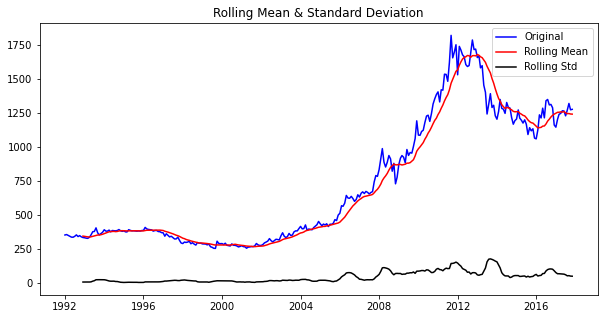

In [ ]:
rolling_means(train)

## Question-4: Explain the significance of above step. What can we infre from the above results?

### Rolling mean is used to smoothen out the data series, the ultimate purpose of rolling mean is to identify long term trends. They are calculated by averaging a group of observations of a variable of interest (in our case above, gold prices) over a specified period of time (rolling window of 12 months). Rolling standard deviation is a statistical measure of market voliatlity, it makes no prediction of market direction but serves as a confirming indicator.The period needs to be specified (in our case above it is 12 months) and it computes the standard deviation of the prices from the moving average of the prices. From the above graph, it can be seen that from year 1992 to 2004, rolling mean is close to original mean and standard deviation is less whereas from year 2004 to 2012/2013, there is difference between original mean and rolling mean and a higher standard deviation is observed. Both rolling mean and standard deviation have an upward trend and are not constant and hence this is not a good time series for forecasting.

## Perform ADF test to check the stationarity of the data

In [ ]:

def adf_test(time_series):
    from statsmodels.tsa.stattools import adfuller
    dftest  =  adfuller(time_series['Value'], autolag = 'AIC')

    dfoutput  =  round(pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used']),4)
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]  =  value

    print('Results of Dickey Fuller Test:')
    print(dfoutput)

In [ ]:
adf_test(train)

Results of Dickey Fuller Test:
Test Statistic                  -0.627000
p-value                          0.864800
#Lags Used                      11.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


## Question-5: What is the null hypothesis of the ADF test? What can you infer from the results of this test?

### The null hypothesis of the ADF test is that the time series has trend and seasonality. Since P value is more than 0.05 hence we failed to reject null hypothesis. The time series is not stationery.

# Log Transformation and Differencing

Here we will remove the trend and seasonality from our data.

In [ ]:
log_trans = np.log(train['Value'])

In [ ]:
diff_data = pd.DataFrame(log_trans - log_trans.shift()).dropna()

## Question-6: Previously we have created a functions for plotting rolling mean and standard deviation. Use the same function and check the plot of `diff_data`

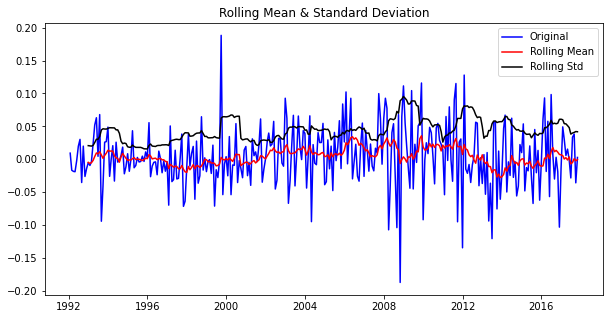

In [ ]:
rolling_means(diff_data)

## Question-7: Previously we have created a functions for perfroming adf_test. Use the same function and check the adf_test results for `diff_data`

In [ ]:
adf_test(diff_data)

Results of Dickey Fuller Test:
Test Statistic                 -20.000300
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    309.000000
Critical Value (1%)             -3.451691
Critical Value (5%)             -2.870939
Critical Value (10%)            -2.571778
dtype: float64


## Question-8: Is the data stationary now? Explain the results here

### Yes, the data is stationery now as the P value is less than 0.05 (0.00 as can be seen above). Since the P value is less than 0.05, the null hypothesis can be rejected now.

## Now, before performing time series forecasting lets plot the acf and pacf

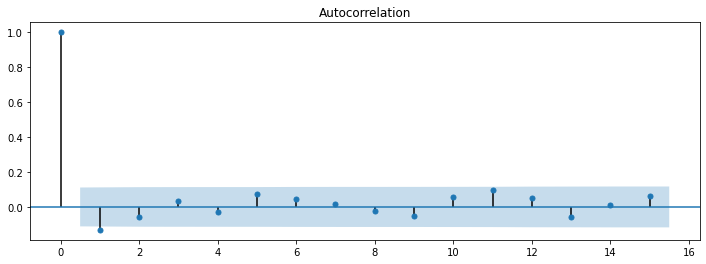

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(diff_data, ax=plt.gca(), lags = 15)
plt.show()

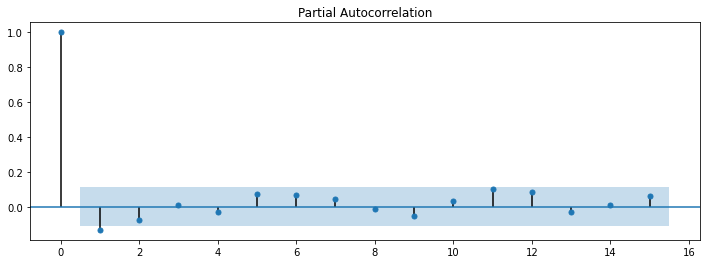

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(diff_data, ax=plt.gca(), lags = 15)
plt.show()

## Question-9: What can you infer from the above plots?

### From the above auto correlation graph, it can be seen that the maximum correlation that the value of gold is having is with its previous months value and also the value of its 11nth month, but that is not a very significant as the line is not extending beyong the blue horizontal line. From the PACF graph as well, the same inference can be drawn, that there is one significant correlation of residuals or errors with that of its previous month and a not so significant correlation with the residuals or error of its 11nth month, same as ACF graph. Hence ACF and PACF both are 1 in this case.

### Performing log transformation and differencing on the test dataset

In [ ]:
log_test = np.log(test)
diff_test = pd.DataFrame(log_test - log_test.shift()).dropna()

Now let's build an AR Model using the differenced data

In [ ]:
from statsmodels.tsa.ar_model import AR
model = AR(diff_data)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 16
Coefficients: const        0.003482
L1.Value    -0.160156
L2.Value    -0.072917
L3.Value     0.021436
L4.Value    -0.021381
L5.Value     0.067502
L6.Value     0.061787
L7.Value     0.035710
L8.Value    -0.019886
L9.Value    -0.055247
L10.Value    0.044038
L11.Value    0.108571
L12.Value    0.085354
L13.Value   -0.022430
L14.Value    0.023971
L15.Value    0.069003
L16.Value    0.040206
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


## Make predictions (ONLY FOR THE NEXT 12 MONTHS )

## Using the model(trained in the previous step) to predict for next 12 months.

In [ ]:
predictions = model_fit.predict(start=len(diff_data), end=len(diff_data)+len(diff_test)-1, dynamic=False)
predictions.head()

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], diff_test.iloc[i]))


predicted=-0.006900, expected=0.012079
predicted=0.008972, expected=0.038259
predicted=0.010507, expected=-0.025368
predicted=-0.002804, expected=0.012236
predicted=0.001199, expected=-0.012733
predicted=0.002680, expected=-0.009609
predicted=0.003664, expected=-0.036820
predicted=0.010589, expected=-0.023351
predicted=0.009614, expected=-0.015668
predicted=0.000235, expected=-0.008956
predicted=-0.002828, expected=0.034542
predicted=0.006575, expected=-0.000691


## Plotting the AR MODEL

Plotting AR model


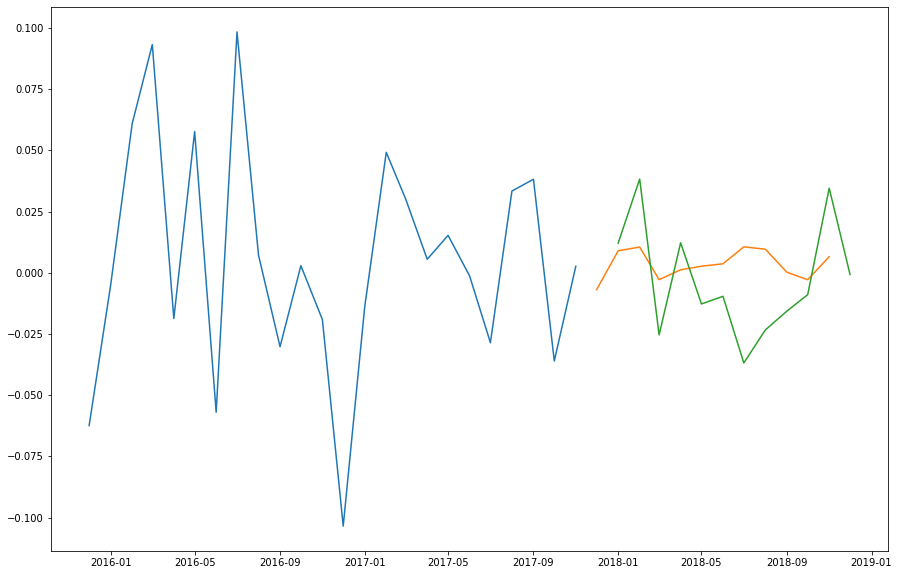

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(diff_data[-24:])
plt.plot(predictions)
plt.plot(diff_test)
print('Plotting AR model')

In [ ]:
diff_test = diff_test['Value']

KeyError: ignored

## Evaluate the accuracy of the model using metrics such as MSE and MAPE

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(predictions, diff_test)

1014.3368887252551

In [ ]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(predictions, diff_test)
print('Test MSE: %.3f' % error)

Test MSE: 0.001


## Now let's build a MA Mode using the differenced data: Use order = (0,0,1)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(diff_data,order=(0,0,1))
results_MA = model.fit()
print('Lag: %s' % results_MA.k_ar)
print('Coefficients: %s' % results_MA.params)

Lag: 0
Coefficients: const          0.004149
ma.L1.Value   -0.149362
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


## Make predictions (ONLY FOR THE NEXT 12 MONTHS )

## Using the model(trained in the previous step) to predict for next 12 months.

In [ ]:
predictions_ma = results_MA.predict(start=len(diff_data), end=len(diff_data)+len(diff_test)-1, dynamic=False)
predictions_ma.head()

for i in range(len(predictions_ma)):
    print('predicted=%f, expected=%f' % (predictions_ma[i], diff_test.iloc[i]))

predicted=0.005147, expected=0.012079
predicted=0.004149, expected=0.038259
predicted=0.004149, expected=-0.025368
predicted=0.004149, expected=0.012236
predicted=0.004149, expected=-0.012733
predicted=0.004149, expected=-0.009609
predicted=0.004149, expected=-0.036820
predicted=0.004149, expected=-0.023351
predicted=0.004149, expected=-0.015668
predicted=0.004149, expected=-0.008956
predicted=0.004149, expected=0.034542
predicted=0.004149, expected=-0.000691


## Plotting the MA Model

Plotting MA model


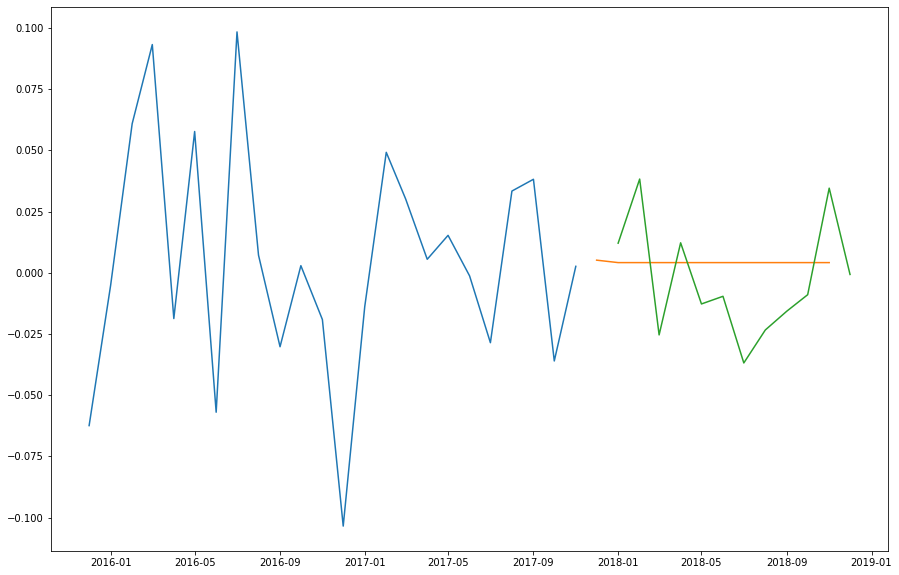

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(diff_data[-24:])
plt.plot(predictions_ma)
plt.plot(diff_test)
print('Plotting MA model')

## Evaluate the accuracy of the MA model using metrics such as MSE and MAPE

In [ ]:
mean_absolute_percentage_error(predictions_ma, diff_test)

530.387839648344

In [ ]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(predictions_ma, diff_test)
print('Test MSE: %.3f' % error)

Test MSE: 0.001


## Using the value p as 11 and q as 2, building a ARMA model.

In [ ]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(diff_data,order=(11,2))
model_arma = model.fit(transparams=False)
print('Lag: %s' % model_arma.k_ar)
print('Coefficients: %s' % model_arma.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Lag: 11
Coefficients: const           0.003849
ar.L1.Value     0.515452
ar.L2.Value     0.186491
ar.L3.Value     0.092601
ar.L4.Value    -0.013701
ar.L5.Value     0.078679
ar.L6.Value     0.013471
ar.L7.Value    -0.022282
ar.L8.Value    -0.056313
ar.L9.Value    -0.036632
ar.L10.Value    0.077483
ar.L11.Value    0.067240
ma.L1.Value    -0.679621
ma.L2.Value    -0.165975
dtype: float64


## Making predictions using ARMA model

In [ ]:
predictions_arma = model_arma.predict(start=len(diff_data), end=len(diff_data)+len(diff_test)-1, dynamic=False)
predictions_arma.head()

for i in range(len(predictions_arma)):
    print('predicted=%f, expected=%f' % (predictions_arma[i], diff_test.iloc[i]))

predicted=-0.002592, expected=0.012079
predicted=0.001452, expected=0.038259
predicted=0.007426, expected=-0.025368
predicted=0.004344, expected=0.012236
predicted=0.003137, expected=-0.012733
predicted=-0.001565, expected=-0.009609
predicted=0.001770, expected=-0.036820
predicted=0.008260, expected=-0.023351
predicted=0.005011, expected=-0.015668
predicted=0.002619, expected=-0.008956
predicted=0.002727, expected=0.034542
predicted=0.002090, expected=-0.000691


Plotting ARMA model


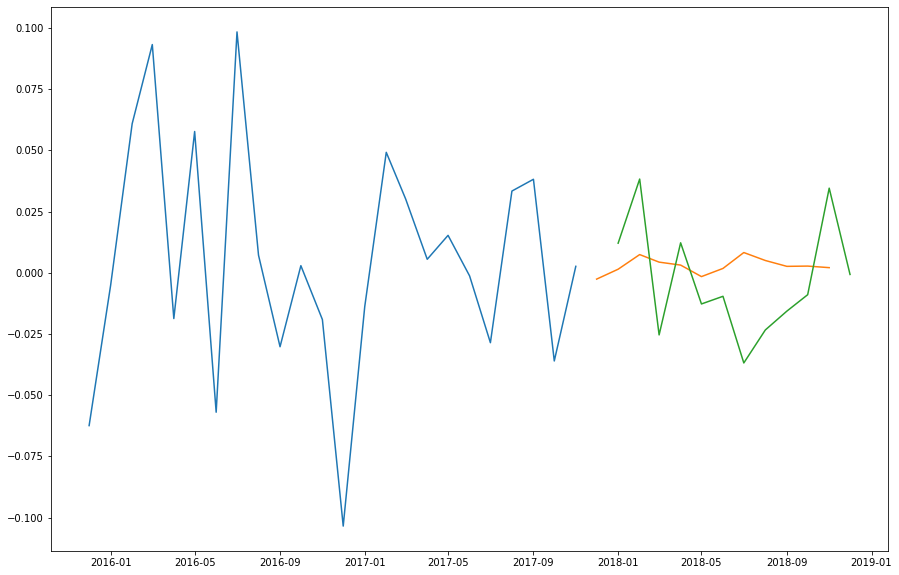

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(diff_data[-24:])
plt.plot(predictions_arma)
plt.plot(diff_test)
print('Plotting ARMA model')

## Evaluate the accuracy of the ARMA model using metrics such as MSE and MAPE`

In [ ]:
mean_absolute_percentage_error(predictions_arma, diff_test)

660.8010873948957

In [ ]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(predictions_arma, diff_test)
print('Test MSE: %.3f' % error)

Test MSE: 0.001


## Question-10: Compare AR,MA and ARMA models using the evaluation metrics and decide the best performing model.

### As per the results of both the models run and metrics given in the results above, it can be seen that AR and MA model is running better than ARMA model. As MAPE for AR and MA model is 530.38 as compared to MAPE as per ARMA model which is 660.8. That mean the predicted value of AR and MA model is more precise compared to ARMA model. Also from the graph it can be seen that for AR and MA model the orange line is straight whereas for ARMA model it is a fluctuating line showing more variance from the actual values.